importing Jupyter notebook from exp_1_diff_sets.ipynb
34 42
0.8873239436619718


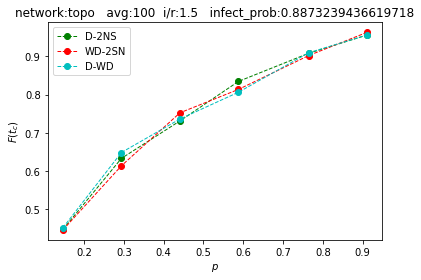

In [1]:
import import_ipynb
import networkx as nx
import sys
import os
# dir_path = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
# sys.path.append(dir_path)
sys.path.append(r"C:\Users\egbonsisi\ControllerPlacementCodes\Skoltech-PhD-Thesis\_codes\SIR\Influential-nodes-identification-in-complex-networks-via-information-entropy")
from algorithms import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle
# %run experiment_1.ipynb
import exp_1_diff_sets

In [2]:
data_file = 'topo'  # 'HepPh'
G = clean_data(data_file)
print(nx.number_of_nodes(G), nx.number_of_edges(G))
geo_loc_data = get_geo_data("Internet2LatLong.csv")
edge_geo_data_combined = assign_location(G, geo_loc_data)

# set edge attributes
set_edge_attr(G, edge_geo_data_combined)


34 42


In [3]:
max_ = len(opti_rank_m3)/nx.number_of_nodes(G)  # 0.16
max_topk = round(max_ * nx.number_of_nodes(G))
print(max_topk)
infect_prob = compute_probability(G) * 1.5
avg = 100
max_iter = 200000
topk = round(max_ * nx.number_of_nodes(G))
topk


NameError: name 'opti_rank_m3' is not defined

In [5]:
list(range(10, 21, 1))


[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [6]:
cover_probys = [infect_prob / a/10 for a in list(range(10, 21, 1))]
cover_probys

NameError: name 'infect_prob' is not defined

In [7]:
m0_result = [get_sir_result(G, ranked_nodes_m0, topk, avg, infect_prob, c, max_iter)[-1] / nx.number_of_nodes(G) for c in tqdm(cover_probys)]
m1_result = [get_sir_result(G, ranked_nodes_m1, topk, avg, infect_prob, c, max_iter)[-1] / nx.number_of_nodes(G) for c in tqdm(cover_probys)]
m2_result = [get_sir_result(G, ranked_nodes_m2, topk, avg, infect_prob, c, max_iter)[-1] / nx.number_of_nodes(G) for c in tqdm(cover_probys)]
m3_result = [get_sir_result(G, ranked_nodes_m3, topk, avg, infect_prob, c, max_iter)[-1] / nx.number_of_nodes(G) for c in tqdm(cover_probys)]


NameError: name 'cover_probys' is not defined

In [8]:
%matplotlib inline
plt.title(f'network:{data_file}   avg:{avg}  i/r:{atio}   infect_prob:{infect_prob}')
plt.plot(np.array(range(10, 21, 1)) / 10, m0_result, 'g--o', label='D-2NS', linewidth=1.0, )
# plt.plot(np.array(range(10, 21, 2)) / 10, m1_result, 'b-o', label='D-2SN', linewidth=1.0, )
plt.plot(np.array(range(10, 21, 1)) / 10, m2_result, 'r--o', label='WD-2SN', linewidth=1.0, )
plt.plot(np.array(range(10, 21, 1)) / 10, m3_result, 'c--o', label='D-WD', linewidth=1.0, )
plt.legend(loc="upper left")
plt.ylabel("$F(t_c)$")
plt.xlabel('$\lambda$')
plt.show()
 


NameError: name 'avg' is not defined

In [10]:
print("D-2NS: ",cluster_optimal_nodes(G, opti_rank_m0))
print(" ")
print("WD - 2SN: ",cluster_optimal_nodes(G, opti_rank_m2))
print(" ")
print("D - WD ",cluster_optimal_nodes(G, opti_rank_m3))


NameError: name 'opti_rank_m0' is not defined